# 💻 **Meaning In the Machine**

 **LG467** Linguistics and Computers · 7 October 2024

 Thammasat University · Chayapatr Archiwaranguprok

 🪐 **Materials available on**: https://github.com/chayapatr/meaning

## 🔡 Part 1: Letters

In [1]:
text = "Cats"
ascii_representation = [[char, ord(char), bin(ord(char))] for char in text]

for i in ascii_representation:
  print(f"{i[0]} -> {i[1]} ({i[2]})")

C -> 67 (0b1000011)
a -> 97 (0b1100001)
t -> 116 (0b1110100)
s -> 115 (0b1110011)


In [2]:
# Get distance between 2 words using Levenshtein distance
def levenshtein_distance(word1, word2):
    m = len(word1)
    n = len(word2)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j],
                                   dp[i][j-1],
                                   dp[i-1][j-1])

    return dp[m][n]

# Compare words
print("🏃 Distance Between:")
for word in ['Cans', 'CATS', 'Tiger', 'Feline']:
  distance = levenshtein_distance(text, word)
  print(f"'{text}' and '{word}'\t-> {distance}")

# "Cats" and "CATS" are even more different than "Cats" and "Cans"

🏃 Distance Between:
'Cats' and 'Cans'	-> 1
'Cats' and 'CATS'	-> 3
'Cats' and 'Tiger'	-> 5
'Cats' and 'Feline'	-> 6


## 🌲 Part 2: WordNet

In [3]:
import nltk
from nltk.corpus import wordnet as wn

# Download required NLTK data
nltk.download('wordnet', quiet=True)

True

In [4]:
def wn_explore_synset(synset, depth=0):
    # Print the synset name and definition
    print("  " * depth + f"- {synset.name()} ({synset.pos()}): {synset.definition()}")

    # Examples
    if synset.examples():
        print("  " * (depth + 1) + "Examples:")
        for example in synset.examples():
            print("  " * (depth + 2) + f"• {example}")

    # Hypernyms (more general terms)
    if synset.hypernyms():
        print("  " * (depth + 1) + "Hypernyms:")
        for hypernym in synset.hypernyms():
            print("  " * (depth + 2) + f"• {hypernym.name()}")

    # Hyponyms (more specific terms)
    if synset.hyponyms():
        print("  " * (depth + 1) + "Hyponyms:")
        for hyponym in synset.hyponyms():
            print("  " * (depth + 2) + f"• {hyponym.name()}")

def wn_explore_word(word):
    print(f"Exploring WordNet for '{word}':")

    # Get all synsets for the word
    synsets = wn.synsets(word)

    if not synsets:
        print(f"No synsets found for '{word}'")
        return

    # Explore each synset
    for i, synset in enumerate(synsets, 1):
        print(f"\nSynset {i}:")
        wn_explore_synset(synset)

        # For verbs, show verb groups
        if synset.pos() == 'v':
            print(f"  Verb Groups: {', '.join([x.name() for x in synset.verb_groups()])}")

# Run the exploration for 'cat'
wn_explore_word('cat')

Exploring WordNet for 'cat':

Synset 1:
- cat.n.01 (n): feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
  Hypernyms:
    • feline.n.01
  Hyponyms:
    • domestic_cat.n.01
    • wildcat.n.03

Synset 2:
- guy.n.01 (n): an informal term for a youth or man
  Examples:
    • a nice guy
    • the guy's only doing it for some doll
  Hypernyms:
    • man.n.01
  Hyponyms:
    • sod.n.04

Synset 3:
- cat.n.03 (n): a spiteful woman gossip
  Examples:
    • what a cat she is!
  Hypernyms:
    • gossip.n.03
    • woman.n.01

Synset 4:
- kat.n.01 (n): the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
  Examples:
    • in Yemen kat is used daily by 85% of adults
  Hypernyms:
    • stimulant.n.02

Synset 5:
- cat-o'-nine-tails.n.01 (n): a whip with nine knotted cords
  Examples:
    • British sailors feared the cat
  Hypernyms:
    • whip.n.01

Synset 6:
- caterpillar.n.02 (n): a la

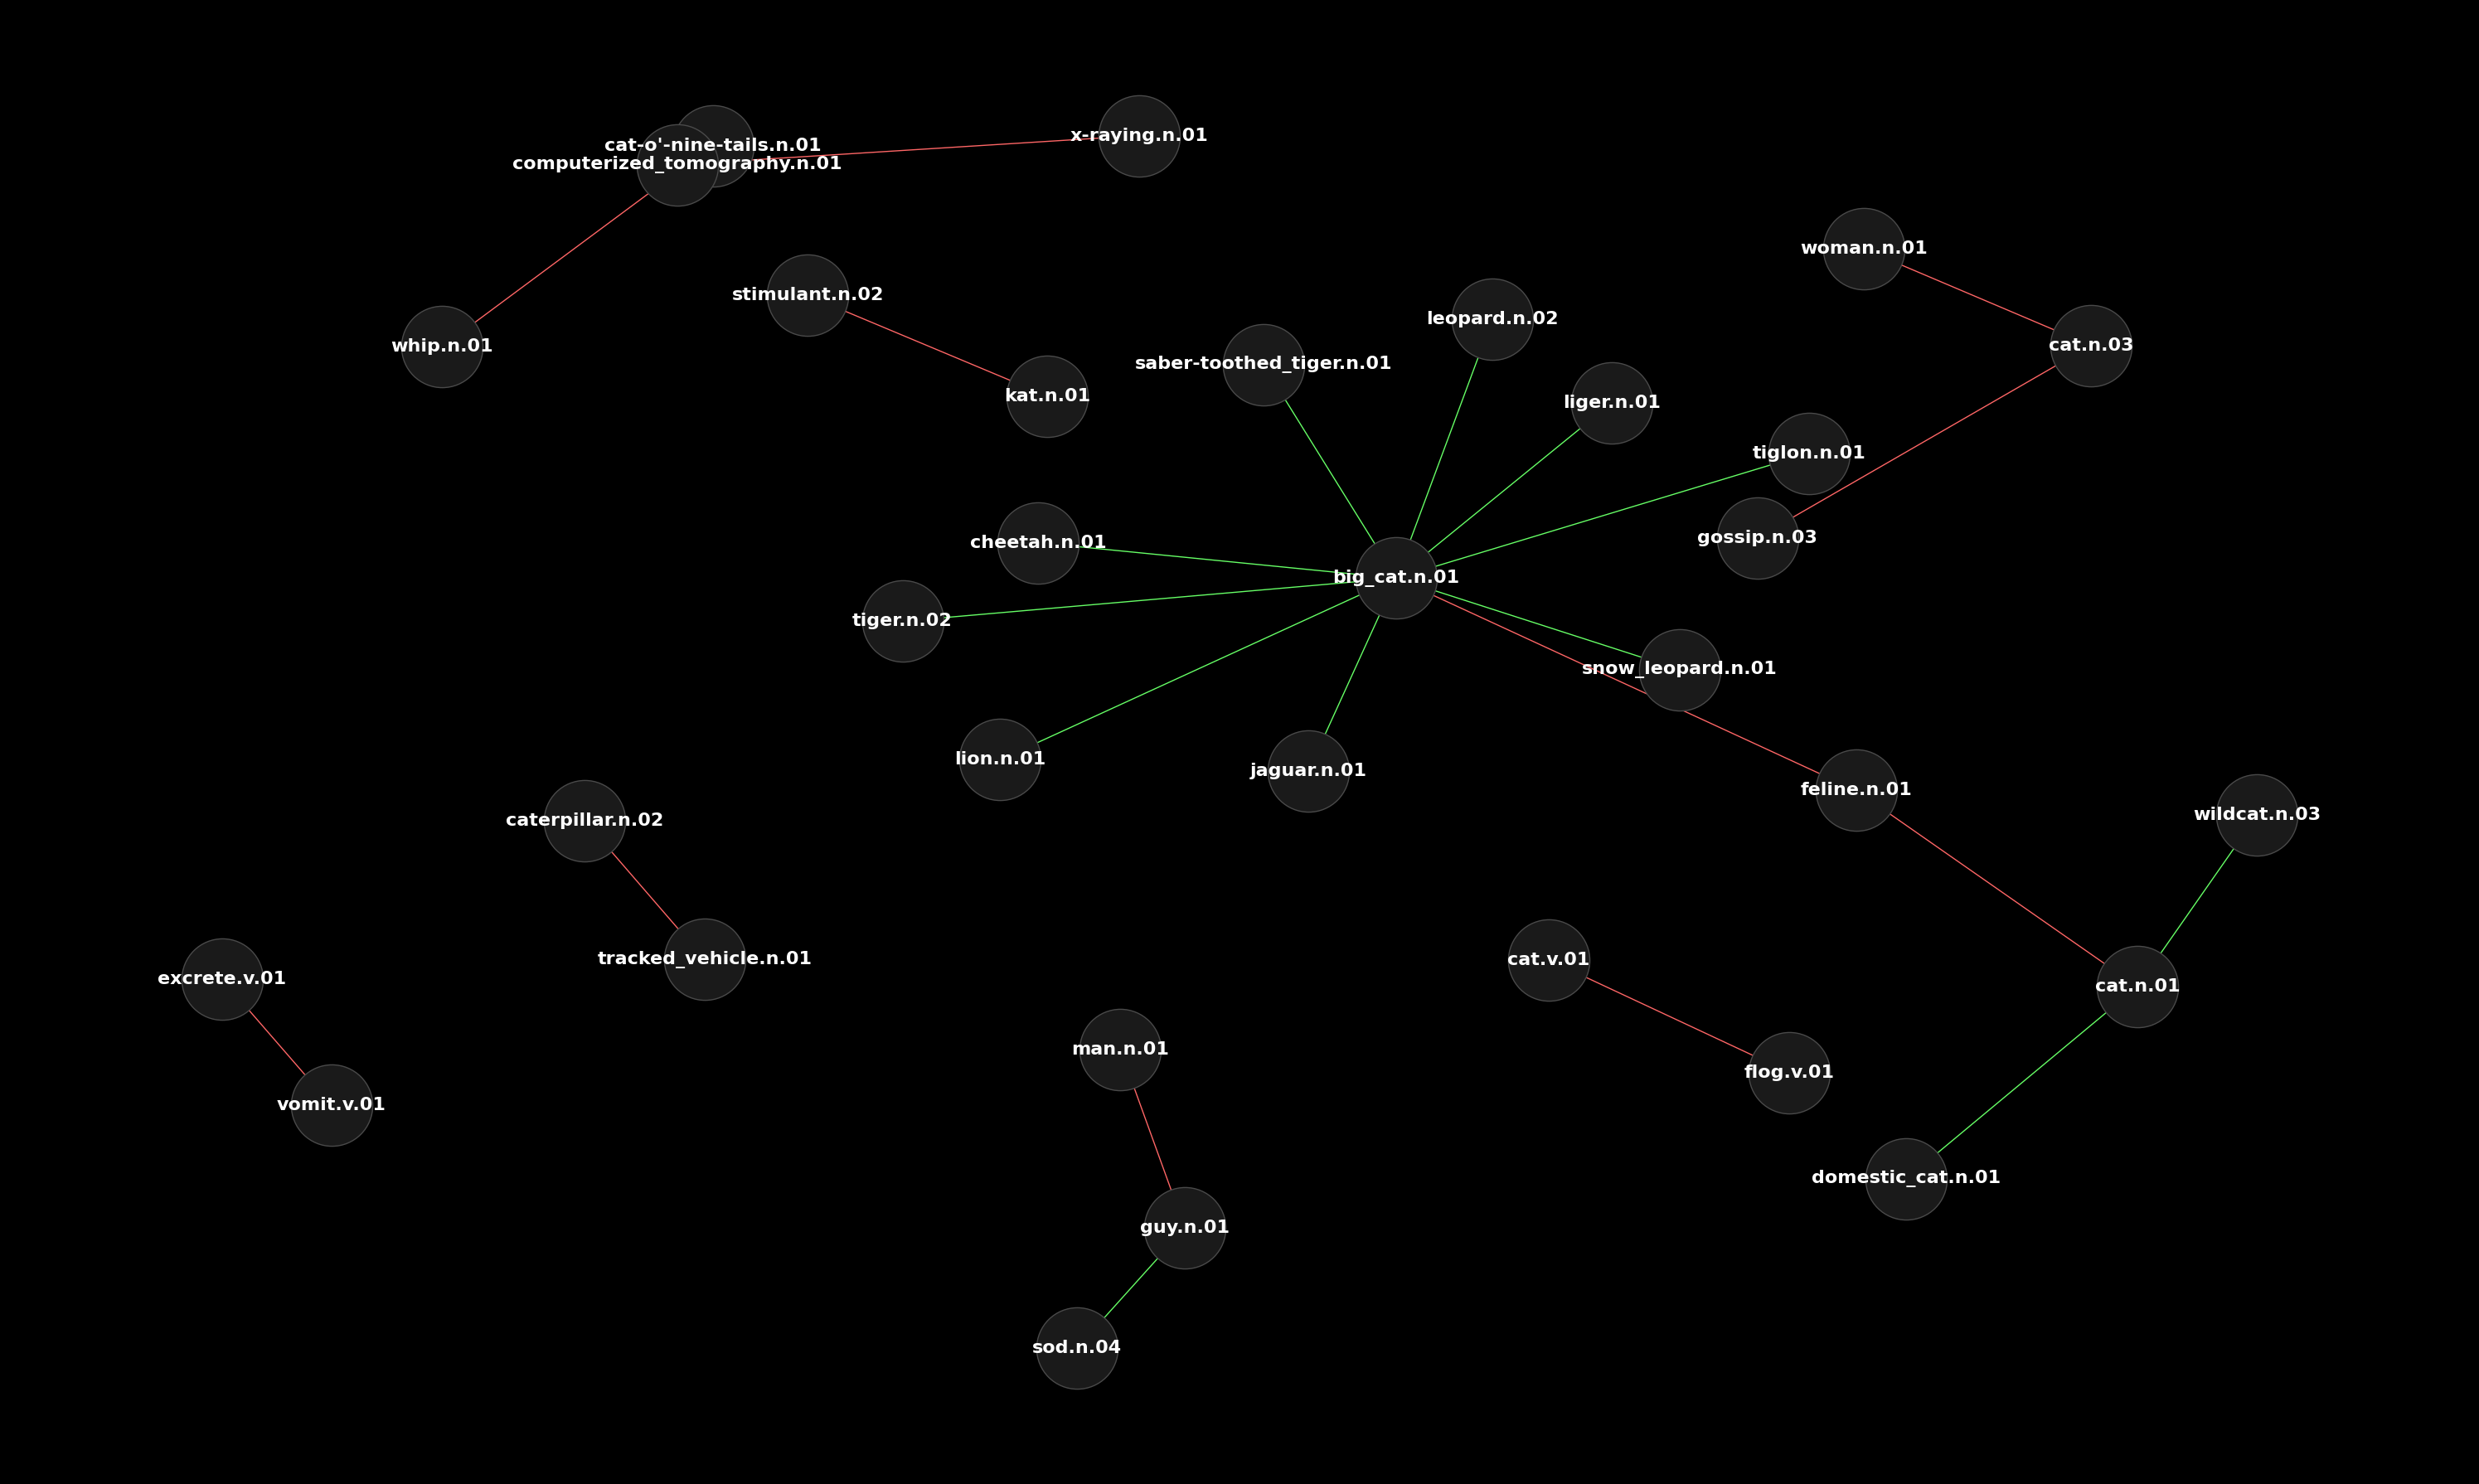


👀 Stats
Number of nodes: 32
Number of edges: 23


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def create_wordnet_graph(word, max_depth=0):
    G = nx.Graph()

    def add_synset_to_graph(synset, depth=0):
        if depth > max_depth:
            return

        # Add the current synset to the graph
        G.add_node(synset.name(), pos=synset.pos())

        # Add hypernyms
        for hypernym in synset.hypernyms():
            G.add_edge(synset.name(), hypernym.name(), relation='hypernym')
            add_synset_to_graph(hypernym, depth + 1)

        # Add hyponyms
        for hyponym in synset.hyponyms():
            G.add_edge(synset.name(), hyponym.name(), relation='hyponym')
            add_synset_to_graph(hyponym, depth + 1)

    # Start with all synsets of the given word
    for synset in wn.synsets(word):
        add_synset_to_graph(synset)

    return G

def visualize_graph(G, word):
    plt.figure(figsize=(30, 18), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='#1a1a1a', edgecolors='#4a4a4a')
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight="bold", font_color='white')

    # Draw edges
    edge_colors = ['#ff6666' if G[u][v]['relation'] == 'hypernym' else '#66ff66' for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, arrowsize=20)

    # Add a title
    # plt.title(f"WordNet Graph for '{word}'", fontsize=24, color='white', fontfamily='Helvetica Neue')

    # Remove axis
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Create and visualize the graph
word = 'cat'
G = create_wordnet_graph(word)
visualize_graph(G, word)

# Print some information about the graph
print("\n👀 Stats")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Print all unique relationships in the graph
relationships = set(nx.get_edge_attributes(G, 'relation').values())

## 👽 Part 3: Embedding

In [6]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np

# Download and load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

In [7]:
def get_embedding(word):
    try:
        return model[word]
    except KeyError:
        print(f"Warning: '{word}' not found in vocabulary")
        return None

# Get embedding for the word "cat"
word = 'rizz'
cat_embedding = get_embedding(word)
print(f"Embedding for 'cat' (first 5 dimensions): {cat_embedding} (dimensions={len(cat_embedding)})")

TypeError: object of type 'NoneType' has no len()

### Similarity between two embedding
cos(θ) = A · B / ||A|| ||B||

In [8]:
# Get similarity between two words using cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


print("🏃 Similarity Between:")

def compare_set(text, comparisons):
  for word in comparisons:
    distance = cosine_similarity(get_embedding(text), get_embedding(word))
    print(f"'{text}' and '{word}'\t-> {distance}")

sets = [{
  "word":  "cats",
  "comparisons": ['cans', 'cat', 'tiger', 'feline']
  }, {
  "word":  "salmon",
  "comparisons": ['tuna', 'shark', 'apple', 'cat']
  }, {
    "word": "car",
    "comparisons": ['plane', 'bicycle', 'apple', 'shark']
  }]

for s in sets:
  compare_set(s["word"], s["comparisons"])
  print()

🏃 Similarity Between:
'cats' and 'cans'	-> 0.23514556884765625
'cats' and 'cat'	-> 0.8099379539489746
'cats' and 'tiger'	-> 0.45115095376968384
'cats' and 'feline'	-> 0.6726863384246826

'salmon' and 'tuna'	-> 0.6111141443252563
'salmon' and 'shark'	-> 0.3829316794872284
'salmon' and 'apple'	-> 0.27801862359046936
'salmon' and 'cat'	-> 0.21615254878997803

'car' and 'plane'	-> 0.3779698610305786
'car' and 'bicycle'	-> 0.5364484786987305
'car' and 'apple'	-> 0.1283070594072342
'car' and 'shark'	-> 0.22420239448547363



### Arithmetics: 🤴 King - 👨 Man + 👩 Woman ~ 👸 Queen

In [9]:
def word_analogy(word1, word2, word3, n=5):
    emb1 = get_embedding(word1)
    emb2 = get_embedding(word2)
    emb3 = get_embedding(word3)

    if emb1 is None or emb2 is None or emb3 is None:
        return []

    # Perform the analogy calculation
    result_emb = emb1 - emb2 + emb3

    # Find the words with the closest embedding to the result
    return model.similar_by_vector(result_emb, topn=n+3)

# Example usage
word1, word2, word3 = "car", "road", "rail"
results = word_analogy(word1, word2, word3)

print(f"Top 5 results for the analogy: {word1} - {word2} + {word3}")
n = 5
for word, similarity in results:
    if word not in [word1, word2, word3]:
        print(f"{word}: {similarity:.4f}")
        n -= 1
        if n == 0:
            break

# Some interesting examples
# dollar - usa + japan ~ yen
# spain - spanish + french ~ france
# car - road + rail ~ train

Top 5 results for the analogy: car - road + rail
railway: 0.5191
intercity_trains: 0.5175
trains: 0.5137
commuter_rail: 0.5090
train: 0.5070


### Dimensionality reduction using t-SNE

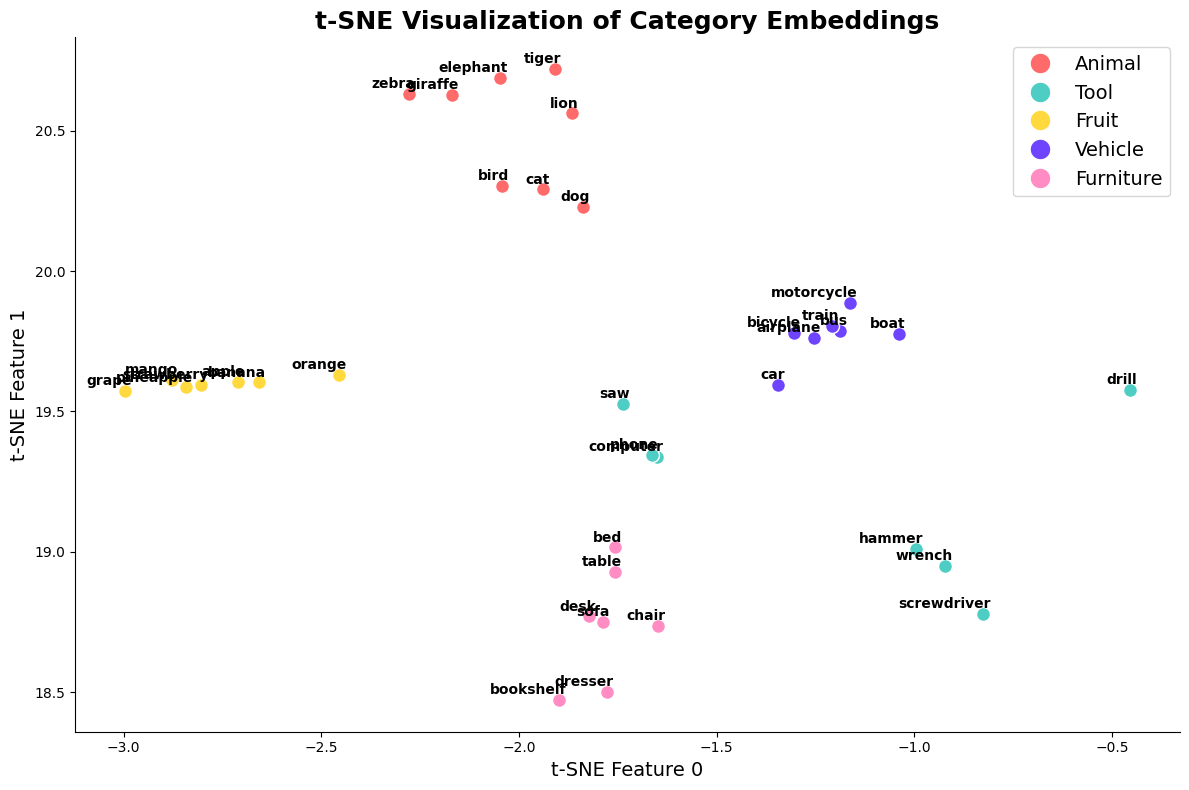

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Define categories
categories = {
    "animal": ["cat", "dog", "bird", "tiger", "elephant", "lion", "giraffe", "zebra"],
    "tool": ["computer", "phone", "hammer", "screwdriver", "wrench", "drill", "saw"],
    "fruit": ["apple", "banana", "orange", "grape", "strawberry", "pineapple", "mango"],
    "vehicle": ["car", "bicycle", "bus", "train", "airplane", "boat", "motorcycle"],
    "furniture": ["chair", "table", "bed", "sofa", "desk", "bookshelf", "dresser"]
}

# Get embeddings for each word
embeddings = []
words = []
colors = []
color_map = {
    "animal": "#FF6B6B",    # Coral Red
    "tool": "#4ECDC4",      # Caribbean Green
    "fruit": "#FFD93D",     # Sunglow
    "vehicle": "#6E44FF",   # Royal Blue
    "furniture": "#FF8CC3"  # Carnation Pink
}

for category, items in categories.items():
    for item in items:
        if item in model.key_to_index:
            embeddings.append(model[item])
            words.append(item)
            colors.append(color_map[category])

# Convert embeddings to numpy array
embeddings = np.array(embeddings)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Set up the plot with Helvetica font
plt.figure(figsize=(12, 8))

# Visualize the results
for i, word in enumerate(words):
    x, y = tsne_results[i, :]
    plt.scatter(x, y, c=colors[i], s=100, alpha=1, edgecolors='white')
    plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=10, fontweight='bold')

plt.title("t-SNE Visualization of Category Embeddings", fontsize=18, fontweight='bold')
plt.xlabel("t-SNE Feature 0", fontsize=14)
plt.ylabel("t-SNE Feature 1", fontsize=14)

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=cat.capitalize(),
                   markerfacecolor=color, markersize=15, markeredgecolor='white')
                   for cat, color in color_map.items()]
plt.legend(handles=legend_elements, loc='best', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Sentiment Analysis

In [11]:
%pip install openai
openai_key = ""
from openai import OpenAI
client = OpenAI(api_key=openai_key)

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
print(get_embedding("skibidi"))
# print(get_embedding("a cat eats a bird"))

[0.023577988147735596, -0.008444305509328842, -0.005488454829901457, -0.0008417638018727303, -0.019558856263756752, -0.0074945795349776745, -0.01489281002432108, -0.006634320132434368, -3.2044659747043625e-05, -0.04682563617825508, -0.046715524047613144, -0.03680533543229103, -0.0036302944645285606, -0.004755513742566109, 0.007535872049629688, 0.04236605390906334, -0.0022728051990270615, -0.028656959533691406, 0.004758954979479313, 0.04448573291301727, 0.03385980799794197, -0.0034186707343906164, 0.0152919702231884, 0.029235053807497025, -0.012952065095305443, 0.0075014615431427956, 0.0033137190621346235, -0.02250438556075096, 0.0559375062584877, -0.04145761951804161, -0.026633629575371742, -0.033639583736658096, 0.022394271567463875, -0.0358969010412693, 0.020783865824341774, 0.0007639102987013757, -0.020770102739334106, 0.04935824126005173, 0.020315885543823242, 0.0012903889873996377, -0.014837753027677536, -0.004865626804530621, -0.004204947967082262, 0.030859224498271942, 0.0186917

In [ ]:
# code from "Using OpenAI APIs Solving Sentiment Analysis Problems in 20 Lines of Code" by Fenix Wang
# https://fenixping.medium.com/using-openai-apis-solving-sentiment-analysis-problems-in-20-lines-of-code-769ae3663682

import numpy as np

positive_review = get_embedding("Positive Review")
negative_review = get_embedding("Negative Review")
positive_example = get_embedding(
    "The coffee at this cafe is exceptional, hardly disappointing.")
negative_example = get_embedding(
    "The coffee at this cafe is disappointing, hardly exceptional.")

def get_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)

positive_score = get_score(positive_example)
negative_score = get_score(negative_example)

print("Positive rating : %f" % (positive_score))
print("Negative rating : %f" % (negative_score))

Positive rating : 0.010697
Negative rating : -0.113391
